Social Networks SS21

# Home Assignment 1



### General Instructions

Submit your solution via Moodle until 23.59pm on Wednesday, May 12th.
Late submissions are accepted for 12 hours following the deadline, with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of 2-4 members.
Please denote all members of the team with their student ID and full name in the notebook.
Please submit only one notebook per team.
Only submit a notebook, do not submit the datasets you used or image files that you have created - these have to be created from your notebook.
Also, do NOT compress/zip your submission!

Cite ALL your sources for coding this home assignment.
In case of plagiarism (copying solutions from other teams or from the internet), ALL team members will be expelled from the course without warning.


### Evaluation and Grading

Evaluation of your submission is done semi-automatically.
Think of it as this notebook being executed once.
Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Make sure to restrict yourself to using packages that are automatically installed along with anaconda, plus some additional packages that have been introduced in context of this class. An overview of packages that may be used in this assignment can be found in the file 'environment.yaml'.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature and header of a function is usually specified in the task description and via code skeletons.
* Again, make sure that all your function as well as variable names match with what we have specified! The automated grading will only match these exact names, and everything that can not be matched will not be graded.
* Whenever there is a written task, e.g. task 1b), enter your answer in the specified markdown cell. Do NOT remove or edit the label (e.g. '__A1b):__' ) from the markdown cell, as this will have to be parsed by the grading system and matched to your answer. 
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading your file via a pandas or numpy command, make sure that it has the form `nx.read_edgelist("example.edgelist")` instead of `nx.read_edgelist("C:/User/Path/to/your/Homework/example.edgelist")` so that the code directly works from our machines.
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points. Run your notebook from top to bottom, make sure there is no error!
  Minimize usage of global variables. Do not reuse variable names multiple times!
* Ensure your code/notebook terminates in reasonable time.
* Textual answers must always be backed by code and may not refer to results that are not part of
  your submission.


**There's a story behind each of these points! Don't expect us to fix your stuff!**

##### List team members, including all student IDs, in the cell below:

In [1]:
# credentials of all team members (you may add or remove items from the list)
team_members = [
    {
        'first_name': 'Esi',
        'last_name': 'Doda',
        'student_id': 416909
    },
    {
        'first_name': 'Seyed Pouria',
        'last_name': 'Mirelmi',
        'student_id': 416910
    },
    {
        'first_name': 'Apeksha',
        'last_name': 'Rahangdale',
        'student_id': 414737
    }
]

In [2]:
# general immports may go here!
import networkx as nx
import numpy as np
from typing import List, Optional, Tuple, Dict

### The Train Bombing Network

For the most part of this home assignment, you will be working on the train bombing network, which is provided in an edgelist format in the file _train.edgelist_.
This undirected network contains contacts between suspected terrorists involved in the train bombing of Madrid on March 11, 2004 as reconstructed from newspapers. A node represents a terrorist and an edge between two terrorists shows that there was a contact between the two terroists. The edge weights denote how 'strong' a connection was. This includes friendship and co-participating in training camps or previous attacks. In the following, we will denote this network as $G$.

__References:__  
1) Dataset in the KONECT graph repository: http://konect.cc/networks/moreno_train/

2) Brian Hayes. Connecting the dots. Can the tools of graph theory and social-network studies unravel the next big plot? American Scientist, 94(5):400--404, 2006.

### Task 1:  Basic Network Properties (8 pts)

__a)__ Read in the data file and store the network into variable `G`. Store the number of nodes and edges of `G` into variables `n_nodes` and `n_edges`! **(2 pts)**


64
243


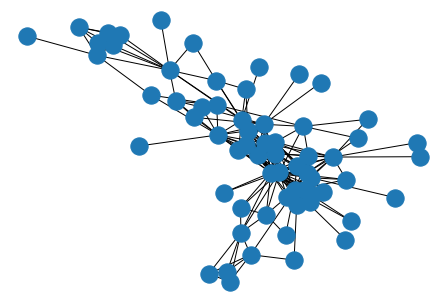

In [3]:
G = nx.read_edgelist('train.edgelist', comments= "%", data=(('weight',int),), create_using=nx.DiGraph()).to_undirected()
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

nx.draw(G)

print(n_nodes)
print(n_edges)

__b)__ Compute the average degree and the density of `G`. Store them into variables `avg_degree` and `density`. Is it sparse? Explain your answer! **(2 pts)**


In [4]:
avg_degree = 2*n_edges/n_nodes
density = nx.density(G)

print(avg_degree)
print(nx.density(G))

7.59375
0.12053571428571429


**A1b):** The network is sparse because it has a very low density value and the average degree is ultimately smaller than the n_edges.

__c)__ Determine the network's diameter and average path length. Store them into variables `diameter`and `avg_pl`. Does it display the small-world-effect? Explain your answer! **(2 pts)**

In [5]:
diameter = nx.diameter(G)
avg_pl = nx.average_shortest_path_length(G)

print(diameter)
print(avg_pl)

6
2.6909722222222223


**A1c):** A network is said to satisfy the small-world property if we have a small average shortest path length. We know that the diameter is the longest shortest path length. By looking at the results, we can see that the average shortest path length is much shorter than the diameter, therefore we can conclude that this network is a "small-world" network.

__d)__ Compute the average local clustering coefficient and store it into `avg_lcc`. Do you think it is highly clustered? Explain your answer! **(2 pts)**

In [6]:
avg_lcc = nx.average_clustering(G)

print(avg_lcc)

0.6223250206309915


**A1d):** The local clustering coefficient is a measure of the fraction of the neighbors that are connected. The average clustering coefficient of a graph is the mean of local clusterings. Its value is between the range 0 and 1, a value close to 0 means that there are few neighbors that are connected, and when the value is 1, then the neighborhood is fully connected. The resulting clustering coefficient is closer to value 1 than 0, so we can conclude that it is highly clustered.

### Task 2: Node Centralities (15 pts)

In this task, we consider the following four node centrality measures:

1. Degree Centrality (DC)
2. Closeness Centrality (CC)
3. Betweenness Centrality (BC)
4. Eigenvector Centrality (EC)

__a)__ For each of the four measures, compute and store the corresponding centrality values of all nodes in the network in dictionaries `DC`, `CC`, `BC` and `EC`! The keys of the dictionaries should represent the node IDs and the corresponding values should represent the centrality of that node. Additionally, store for each of the four measures the node IDs (not the centrality values) with the 10 highest centrality values in lists `DC_top`, `CC_top`, `BC_top` and `EC_top` in descending order (first node in list should have the highest centrality value and so on)! **(3 pts)**

**Example:** _In the example below node 4 has a betweenness centrality of 0.01, which is the third highest value in the network of 4 nodes, as denoted by its third position in list `BC_top`:_

`BC = {'1': 0.05, '2': 0.221, '3': 0.0, '4': 0.01}`

`BC_top = ['2', '1', '4', '3']`

In [7]:
DC = {k: v for k, v in nx.degree_centrality(G).items()} # Degree Centrality of all nodes
CC = {k: v for k, v in nx.closeness_centrality(G).items()} # Closeness Centrality of all nodes
BC = {k: v for k, v in nx.betweenness_centrality(G).items()} # Betweenness Centrality of all nodes
EC = {k: v for k, v in nx.eigenvector_centrality(G).items()} # Eigenvector Centrality of all nodes

DC_top = sorted(DC, key=DC.get, reverse=True)[:10] # Top10 Degree Centrality nodes
print ("Degree Centrality (DC)", DC_top)
CC_top = sorted(CC, key=CC.get, reverse=True)[:10] # Top10 Closeness Centrality nodes
print ("Closeness Centrality (CC)", CC_top)
BC_top = sorted(BC, key=BC.get, reverse=True)[:10] # Top10 Betweenness Centrality nodes
print ("Betweenness Centrality (BC)", BC_top)
EC_top = sorted(EC, key=EC.get, reverse=True)[:10] # Top10 Eigenvector Centrality nodes
print ("EigenVector Centrality (EC)", EC_top)

Degree Centrality (DC) ['1', '3', '7', '10', '25', '16', '18', '17', '22', '30']
Closeness Centrality (CC) ['1', '3', '25', '7', '22', '24', '18', '10', '17', '21']
Betweenness Centrality (BC) ['49', '1', '3', '24', '7', '22', '18', '17', '30', '19']
EigenVector Centrality (EC) ['1', '3', '7', '25', '10', '16', '21', '14', '30', '15']


__b)__ For each of the four measures, compute the average and maximum distance of the most central node to all other nodes in the network! Store the average distances in `DC_avg`, `CC_avg`, `BC_avg`, `EC_avg` and maximum distances in `DC_max`, `CC_max`, `BC_max`, `EC_max`. **(4 pts)**

In [13]:
# Calculate the shortest path length between source node (the most central node) and all other nodes for a weighted graph.
distances_dict_DC = nx.shortest_path_length(G, DC_top[0])
distances_dict_CC = nx.shortest_path_length(G, CC_top[0])
distances_dict_BC = nx.shortest_path_length(G, BC_top[0])
distances_dict_EC = nx.shortest_path_length(G, EC_top[0])
# Get the node with the maximum distance
max_distance_node_DC = max(distances_dict_DC, key=distances_dict_DC.get)
max_distance_node_CC = max(distances_dict_CC, key=distances_dict_CC.get)
max_distance_node_BC = max(distances_dict_BC, key=distances_dict_BC.get)
max_distance_node_EC = max(distances_dict_EC, key=distances_dict_EC.get)

DC_avg = float(sum(distances_dict_DC.values())) / len(distances_dict_DC)
DC_max = distances_dict_DC[max_distance_node_DC]

CC_avg = float(sum(distances_dict_CC.values())) / len(distances_dict_CC)
CC_max = distances_dict_CC[max_distance_node_CC]

BC_avg = float(sum(distances_dict_BC.values())) / len(distances_dict_BC)
BC_max = distances_dict_BC[max_distance_node_BC]

EC_avg = float(sum(distances_dict_EC.values())) / len(distances_dict_EC)
EC_max = distances_dict_EC[max_distance_node_EC]

print(DC_avg)
print(DC_max)
print(CC_avg)
print(CC_max)
print(BC_avg)
print(BC_max)
print(EC_avg)
print(EC_max)

1.6875
4
1.71875
4
2.28125
4
1.6875
4


__c)__ For each of the four centrality measures, scale all node centralities in the graph such that their maximum is 1, i.e., divide them by the maximum value occuring in the network, and store the updated node centralities into `DC_scaled`, `CC_scaled`, `BC_scaled` and `EC_scaled` in the same format as in 2a! Plot the graph in a spring layout with node colors according to their centrality. Use the "coolwarm" colormap from matplotlib for this coloring. Make sure all networks have the same orientation! The code below should save your plots into files **"DC.png"**, **"CC.png"**, **"BC.png"** and **"EC.png"**. Do not remove the lines of code which create and save the .png files, and do not modify your solution from 2a), i.e., do not modify `DC`, `CC`, `BC` and `EC`! **(5 pts)**

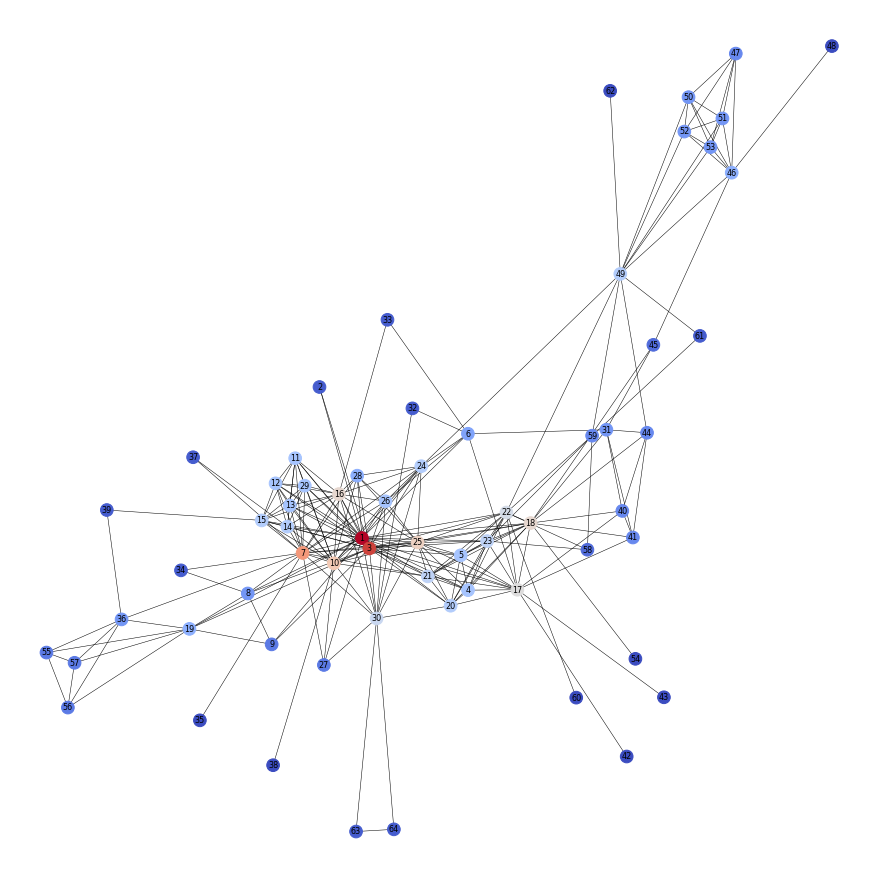

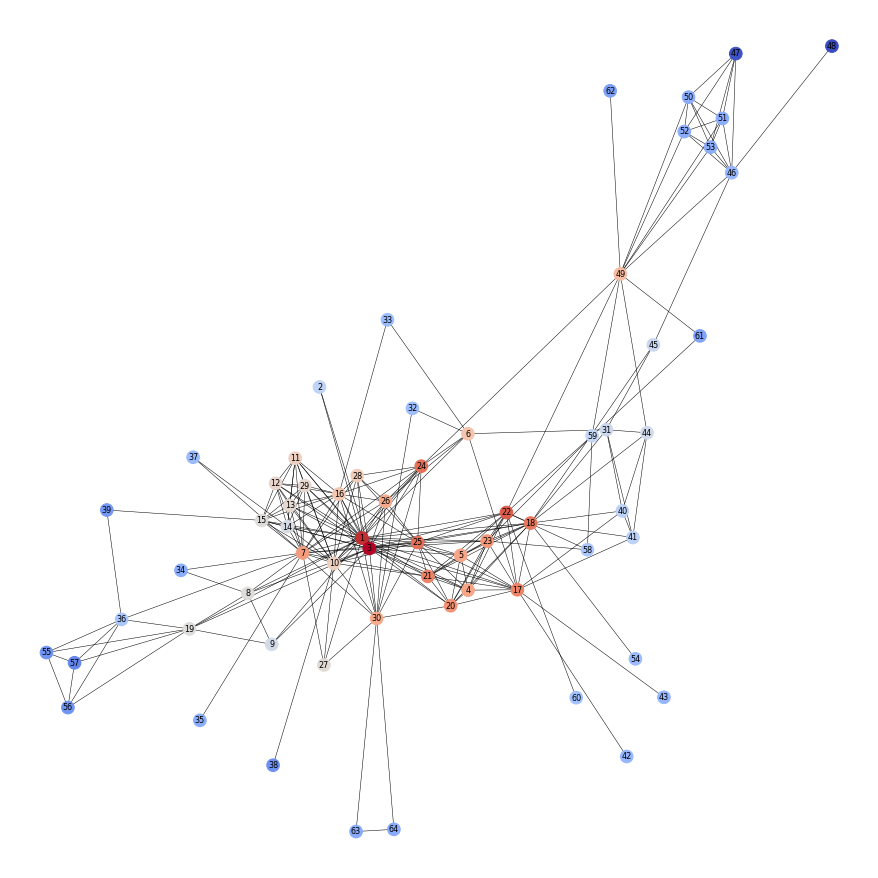

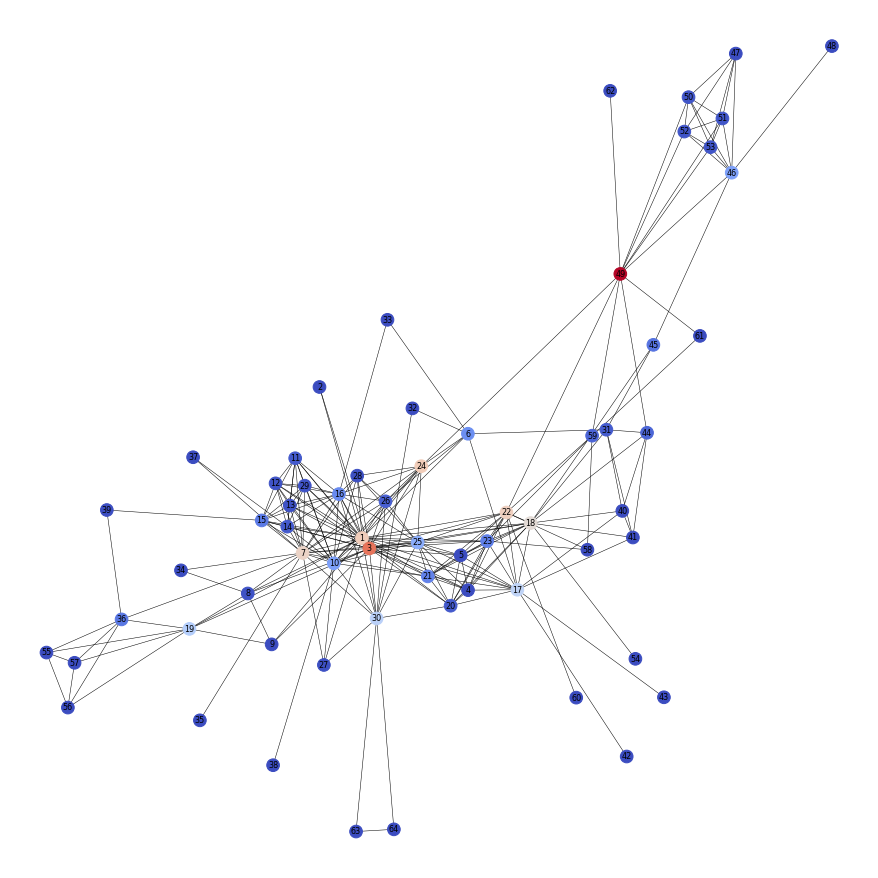

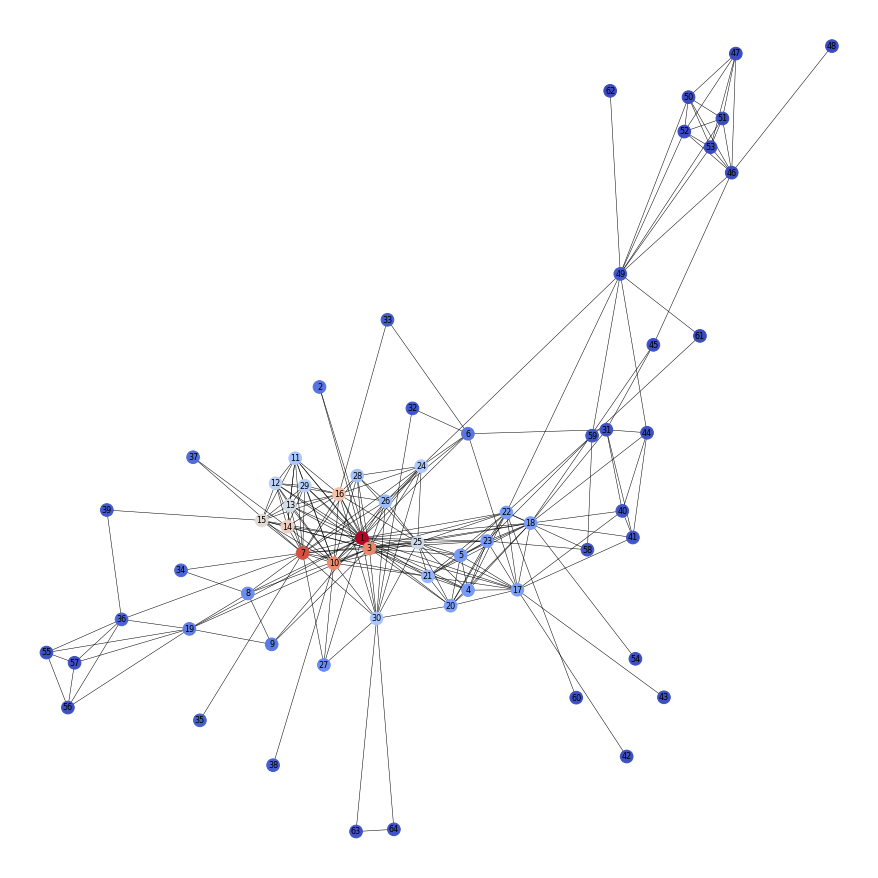

In [13]:
DC_scaled = {k: v/DC.get(DC_top[0]) for k, v in DC.items()} # Scaled Degree Centrality of all nodes
CC_scaled = {k: v/CC.get(CC_top[0]) for k, v in CC.items()} # Scaled Closeness Centrality of all nodes
BC_scaled = {k: v/BC.get(BC_top[0]) for k, v in BC.items()} # Scaled Betweenness Centrality of all nodes
EC_scaled = {k: v/EC.get(EC_top[0]) for k, v in EC.items()} # Scaled Eigenvector Centrality of all nodes


import matplotlib.pyplot as plt

options = {
    'node_size': 160,
    'width': 0.5,
    'with_labels' : True,
    'font_size': 8,
    'cmap': plt.cm.coolwarm
}

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)
nx.draw(G, pos, node_color = list(DC_scaled.values()), **options)
plt.savefig("DC.png")

plt.figure(figsize=(12,12))
nx.draw(G, pos, node_color = list(CC_scaled.values()), **options)
plt.savefig("CC.png")

plt.figure(figsize=(12,12))
nx.draw(G, pos, node_color = list(BC_scaled.values()), **options)
plt.savefig("BC.png")

plt.figure(figsize=(12,12))
nx.draw(G, pos, node_color = list(EC_scaled.values()), **options)
plt.savefig("EC.png")

__d)__ After looking at these measures simultaneously, we look into how those measures differ from each other.
Use your node-wise similarities computed in a) to compute the correlation coefficient of all node-wise similarities between any two centrality measures. For example, store the correlation coefficient of the degree centrality (DC) and the closeness centrality (CC) in `DC_CC`. Which measures are the most correlated, and which measure is least correlated with the rest? Argue why that is the case! **(3 pts)**

In [16]:
import pandas as pd

DC_values = [v for v in DC.values()]
CC_values = [v for v in CC.values()]
BC_values = [v for v in BC.values()]
EC_values = [v for v in EC.values()]

DC_CC = np.corrcoef(DC_values, CC_values)[0,1]
DC_BC = np.corrcoef(DC_values, BC_values)[0,1]
DC_EC = np.corrcoef(DC_values, EC_values)[0,1]
CC_BC = np.corrcoef(CC_values, BC_values)[0,1]
CC_EC = np.corrcoef(CC_values, EC_values)[0,1]
BC_EC = np.corrcoef(BC_values, EC_values)[0,1]

print (f"DC_CC = {DC_CC}")
print (f"DC_BC = {DC_BC}")
print (f"DC_EC = {DC_EC}")
print (f"CC_BC = {CC_BC}")
print (f"CC_EC = {CC_EC}")
print (f"BC_EC = {BC_EC}\n")

print (f"DC Sum = {DC_CC + DC_BC + DC_EC}") 
print (f"CC Sum = {DC_CC + CC_BC + CC_EC}")
print (f"BC Sum = {DC_BC + BC_EC + DC_BC}")
print (f"EC Sum = {DC_EC + CC_EC + BC_EC}")

dataframeCentrality = pd.DataFrame(
    {"Degree Centrality":DC_values,
     "Closeness Centrality":CC_values, 
     "Betweenness Centrality":BC_values,
     "Eigenvector Centrality":EC_values}
)
dataframeCentrality.corr()

DC_CC = 0.8322190719279029
DC_BC = 0.7172257414699502
DC_EC = 0.8695123184848569
CC_BC = 0.6576132003837716
CC_EC = 0.6783034790292266
BC_EC = 0.4828174890801857

DC Sum = 2.41895713188271
CC Sum = 2.168135751340901
BC Sum = 1.9172689720200862
EC Sum = 2.030633286594269


,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality
Degree Centrality,1.000000,0.832219,0.717226,0.869512
Closeness Centrality,0.832219,1.000000,0.657613,0.678303
Betweenness Centrality,0.717226,0.657613,1.000000,0.482817
Eigenvector Centrality,0.869512,0.678303,0.482817,1.000000


**A2d):** The DC & EC measures are the most correlated, and the BC & EC measures are the least correlated ones.

**A2d):** The DC, CC & EC measures are the most correlated, and the BC measures is the least correlated one as others. As we know, Eigenvector centrality depends on degrees of nodes, EC and DC should be correlated. Also, CC depends on closeness of nodes with neighboring nodes; therefore higher the degree centrality, higher the closeness of nodes.

### Task 3: Weak Ties and Triadic Closure (17 pts)

After looking at the nodes of the network, we now consider the (weighted) edges of the network.

__a)__ Consider the distribution of edge weigths. Which edge weights occur in the network, and how often does each edge weight occur in the network? Plot these occurences using a histogram and save it into a file called **"hist_weights.png"**! Do not remove the lines of code which create and save the .png file! **(2 pts)**

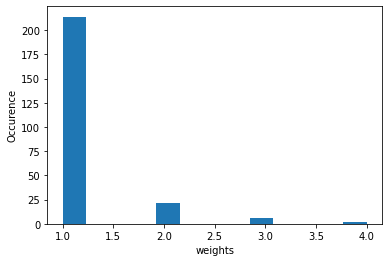

In [15]:
list_of_edges = list(G.edges()) # all edges in a list
list_of_weights = [G[list_of_edges[i][0]][list_of_edges[i][1]]["weight"] for i in range(len(list_of_edges))] # all weights in a list

plt.hist(list_of_weights, bins = 'rice')
plt.xlabel("weights")
plt.ylabel("Occurence")
plt.savefig("hist_weights.png")
plt.show()

__b)__ Write a function that computes the neighborhood overlap score of a given edge, using the function signature which is specified in the cell below. Note that we want to return -1 if the edge does not exist in the network, and that for an edge between nodes $u$ and $v$, we do not count $u$ and $v$ into the union of neighbors in the denominator. **(4 pts)**

**Example:** _Let `H = nx.from_numpy_matrix(np.array([[0,1,1,1,0],[1,0,0,1,1],[1,0,0,1,0],[1,1,1,0,0],[0,1,0,0,0]]))` be an undirected NetworkX graph. Your implementation of `neighborhood_overlap` should return the same output as in the given examples below. Please note that correct output values do not necessarily mean that you have implemented the function correctly. Ideally, you should come up with your own data to test your function._

`neighborhood_overlap((0,1), H) == 0.3333333333333333`

`neighborhood_overlap((0,2), H) == 0.5`

`neighborhood_overlap((0,3), H) == 1.0`

`neighborhood_overlap((1,4), H) == 0.0`

In [18]:
def neighborhood_overlap(edge: Tuple[str, str], G: nx.Graph) -> float:
    
    edge = (str(edge[0]),str(edge[1]))
    
    if not G.has_edge (edge[0], edge[1]):
        return -1
    
    ngbrs1 = set ([n for n in G.neighbors(edge[0])])                #set of neighbors of the first node
    ngbrs1.remove (edge[1])                                         #excluding the other node
    ngbrs2 = set ([n for n in G.neighbors(edge[1])])                #set of neighbors of the second node
    ngbrs2.remove (edge[0])                                         #excluding the other node
    union_of_ngbrs = set.union(ngbrs1, ngbrs2)                      #Union of ngbrs1 and ngbrs2
    common_ngbrs = list (nx.common_neighbors(G, edge[0], edge[1]))  #list of common neighbors
    
    overlap = len(common_ngbrs) / len(union_of_ngbrs)
    
    return overlap

__c)__ Apply your neighborhood overlap function on the network $G$, and save all edges which are local bridges as tuples into list `lb`! The first two values of the tuple should be the nodes of an edge, while the third value should represent the weight of this edge. Again, plot the graph and save it into file **"local_bridges.png"** using a spring layout with the same orientation as in task 2, with all nodes being blue, and color all edges which are local bridges in red! Do not remove the lines of code which create and save the .png file! **(3 pts)**

**Example:** _In the example below there are three local bridges in total. The first local bridge is an edge between nodes 6 and 33 with an edge weight of 1:_

`lb = [('6', '33', 1.0), ('8', '39', 1.0), ('8', '48', 1.0)]`

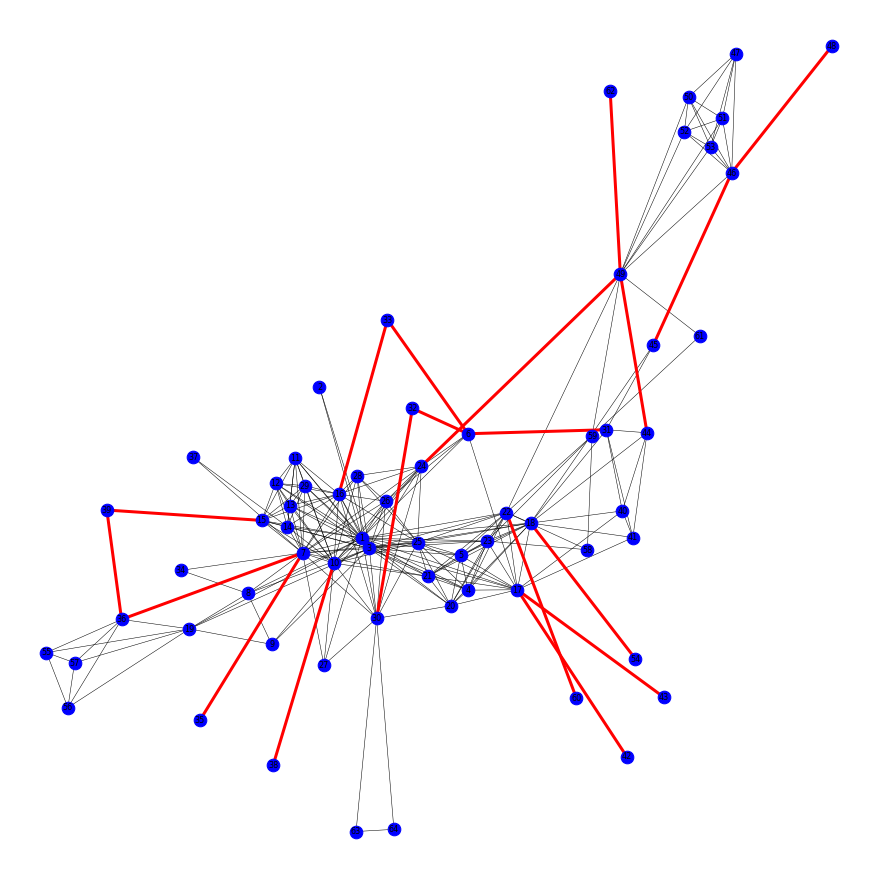

In [17]:
lb = ()
j = 0
b_edges = ()

for i in list_of_edges:
    j = j+1
    if neighborhood_overlap(i,G) == 0:
        b_edges = b_edges + (i,)
        i = i + (list_of_weights[j],)
        lb = lb + (i,)

lb = list(lb)

b_edges = list(b_edges) #list of bridge edges, excluding weights

options = {
    'node_size': 160,
    'width': 0.5,
    'with_labels' : True,
    'font_size': 8,
    'node_color': 'blue'
}

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)
nx.draw(G, pos, **options)
nx.draw_networkx_edges(G,pos,edgelist=b_edges,edge_color='red',width=3)
plt.savefig("local_bridges.png")

__d)__ Finally, we want to check whether a weighted graph fulfills the strong triadic closure property. For that matter, we define an edge $e$ to be strong, if its weight is strictly higher than a given threshold $t$, and as weak otherwise. Implement a function that checks whether all nodes in a graph fulfill the strong triadic closure property, using the function signature in the cell below! **(6 pts)**

**Example:** _Let `H = nx.from_numpy_matrix(np.array([[0,2,1,0,0],[2,0,0,2,1],[1,0,0,0,0],[0,2,0,0,0],[0,1,0,0,0]]))` be an undirected weighted NetworkX graph. Your implementation of `check_stc` should return the same output as in the given examples below. The first output shows, that nodes 0 and 1 do not fulfill the STC property in H for t=0. If we would add an edge between nodes 1 and 2, then node 0 would fulfill the property. The last example shows that all nodes fulfill the property for t=2. Please note that correct output values do not necessarily mean that you have implemented the function correctly. Ideally, you should come up with your own data to test your function._

`check_stc(H,threshold=0) == (False, {0: [(1, 2)], 1: [(0, 3), (0, 4), (3, 4)]})`

`check_stc(H,threshold=1) == (False, {1: [(0, 3)]})`

`check_stc(H,threshold=2) == (True, {})`

In [41]:
from itertools import combinations

def check_stc(G: nx.Graph, attr: Optional[str]="weight", threshold: Optional[int]=1) -> (bool, Dict[str, List[Tuple[str, str]]]):
    """
    :param G: networkx graph whose nodes we want to check. You may assume that it is undirected, but weighted
    :param attr: edge attribute the contains the weights we want to look into
    :param threshold: weight threshold which determines whether an edge is weak or strong. 
    :                
    :return: 1. A bool (True or False), indicating whether all nodes in the graph fulfill the STC property
    :        2. A dictionary of all nodes which do not fulfill the STC property (may be empty if no such node exists). 
    :           The keys are the node IDs, the values are a list of missing edges. 
    """
    STC = True
    missed_edge = dict()
    weight = {frozenset(g): n for g, n in nx.get_edge_attributes(G,attr).items()}
    
    for i in G.nodes():
        strong_one = [nh for nh in nx.neighbors(G,i) if weight[frozenset((i, nh))] > threshold]
        if len(strong_one) > 1:
            edge_to_be = [frozenset(g) for g in combinations(strong_one,2)]
            missed_local_edge = [tuple(g) for g in edge_to_be if g not in weight]
            if len(missed_local_edge) > 0:
                STC = False
                missed_edge[i] = missed_local_edge
    return missed_edge
    
    


__e)__ Apply your function from d) to determine if all nodes in $G$ fulfill the strong triadic closure property, using the threshold $t=1$. If not, which nodes violate it? Do you obtain a different result for $t=2$? Give your answer in the corresponding cell below. Save all nodes which do not fulfill the STC property (may be empty if no such node exists) as a dictionary into `t1_violations` and `t2_violations` for the respective threshold. The keys are the node IDs, the values are a list of missing edges. **(2 pts)**

**Example:** _In the example below there are two violating nodes in total for threshold 1. The first one is node 3, where edges are missing between nodes 13 and 19, and between nodes 14 and 27 in order to fulfill the strong triadic closure property:_

`t1_violations = {'3': [('13', '19'), ('14', '27')], '11': [('22', '31')]}`

In [42]:
t1_violations = check_stc(G, threshold=1)
t2_violations = check_stc(G, threshold=2)

print ("t1_violations = ", t1_violations)
print ("t2_violations = ", t2_violations)

t1_violations =  {'1': [('13', '24'), ('13', '25'), ('14', '24'), ('14', '25'), ('24', '15'), ('25', '15')], '7': [('14', '28'), ('28', '15'), ('28', '29')], '10': [('14', '30')]}
t2_violations =  {}


**A3e):** For a threshold of 1, nodes 1, 7, 10 violates the strong triadic closure (STC) property with the above displayed missing edges whereas for a threshold of 2, no nodes violates STC.